reference
1. https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [5]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
 
print(os.listdir())

df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

['telco_customer_chain.ipynb', 'WA_Fn-UseC_-Telco-Customer-Churn.csv']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# 결제방법별로 매달 결제 금액의 차이가 있을까? -> ANOVA

grouped = df.groupby('PaymentMethod')['MonthlyCharges'].describe()

# 전체 통계도 따로 구해서 붙이기
overall = df['MonthlyCharges'].describe()
overall.name = '전체'

# concat으로 결합
result = pd.concat([grouped, overall.to_frame().T])
result

,count,mean,std,min,25%,50%,75%,max
Bank transfer (automatic),1544.0,67.192649,30.555200,18.40,41.0875,73.100,92.9625,118.75
Credit card (automatic),1522.0,66.512385,30.612424,18.25,38.6625,73.025,90.8500,117.50
Electronic check,2365.0,76.255814,24.053655,18.85,60.1500,80.550,94.7000,118.65
Mailed check,1612.0,43.917060,26.314665,18.70,20.1500,34.700,64.9125,118.60
전체,7043.0,64.761692,30.090047,18.25,35.5000,70.350,89.8500,118.75


# 정규성을 만족하는가?



<Axes: >

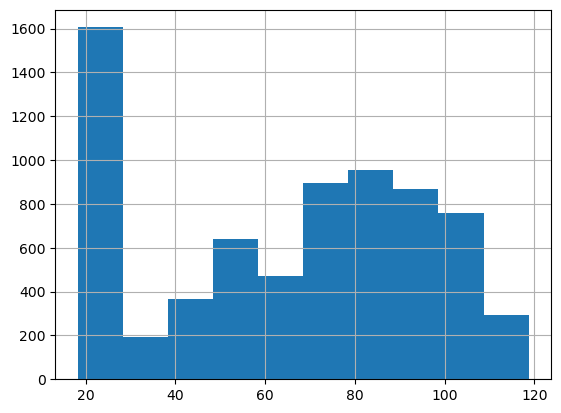

In [13]:
df['MonthlyCharges'].hist()

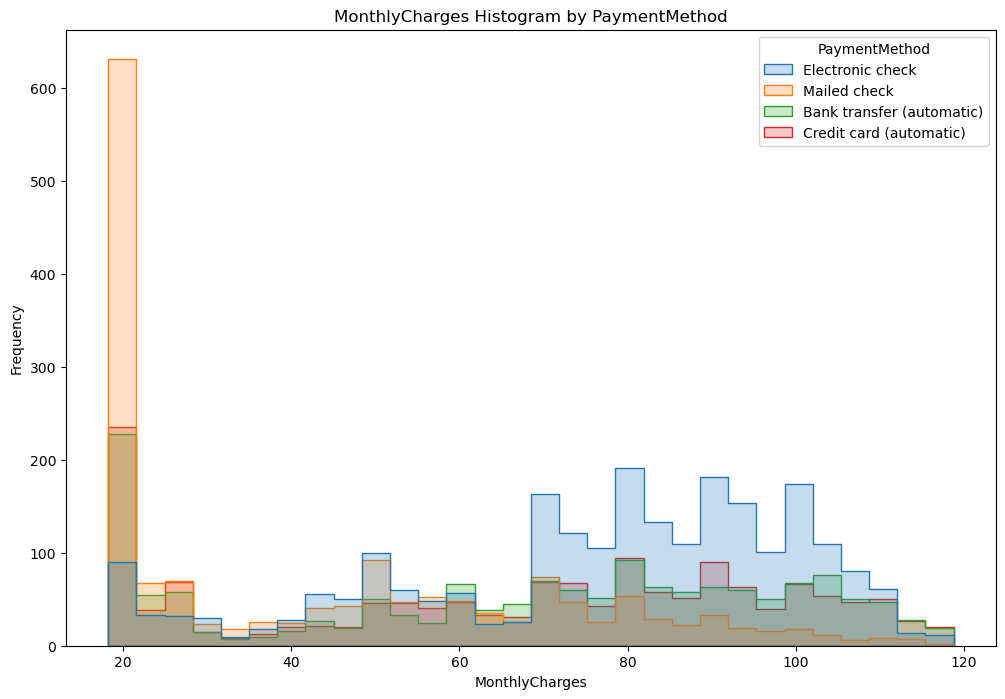

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='MonthlyCharges', hue='PaymentMethod', bins=30, element='step', stat='count', common_norm=False)

plt.title('MonthlyCharges Histogram by PaymentMethod')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()

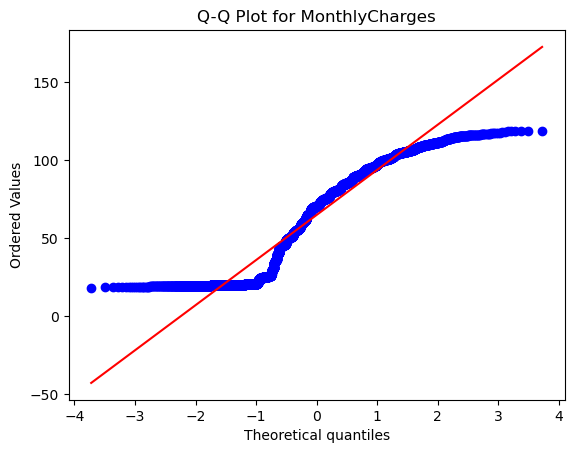

In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 예시: MonthlyCharges에 대해 Q-Q plot
stats.probplot(df['MonthlyCharges'], dist="norm", plot=plt)
plt.title('Q-Q Plot for MonthlyCharges')
plt.show()

In [22]:
methods = df['PaymentMethod'].unique().tolist()

In [24]:
from scipy.stats import shapiro, kstest, normaltest

for method in methods:
    method_df = df[df['PaymentMethod']==method]['MonthlyCharges']
    
    print(f"---- method : {method} ----")
    stat, p = shapiro(method_df)
    print(f"Shapiro-Wilk test: stat={stat:.4f}, p={p:.4f}")
    stat, p = kstest(method_df, 'norm', args=(method_df.mean(), method_df.std()))
    print(f"K-S test: stat={stat:.4f}, p={p:.4f}")
    stat, p = normaltest(method_df)
    print(f"Normal test: stat={stat:.4f}, p={p:.4f}")

---- method : Electronic check ----
Shapiro-Wilk test: stat=0.9364, p=0.0000
K-S test: stat=0.1008, p=0.0000
Normal test: stat=181.8950, p=0.0000
---- method : Mailed check ----
Shapiro-Wilk test: stat=0.8470, p=0.0000
K-S test: stat=0.2229, p=0.0000
Normal test: stat=196.5956, p=0.0000
---- method : Bank transfer (automatic) ----
Shapiro-Wilk test: stat=0.9198, p=0.0000
K-S test: stat=0.1294, p=0.0000
Normal test: stat=1212.8338, p=0.0000
---- method : Credit card (automatic) ----
Shapiro-Wilk test: stat=0.9202, p=0.0000
K-S test: stat=0.1307, p=0.0000
Normal test: stat=1496.8954, p=0.0000


# 등분산성을 만족하는가?

In [25]:
from scipy.stats import levene

# PaymentMethod별로 MonthlyCharges 분리
groups = [group['MonthlyCharges'].values for name, group in df.groupby('PaymentMethod')]

# Levene’s test 실행
stat, p = levene(*groups)
print(f"Levene’s test statistic = {stat:.3f}, p-value = {p:.3f}")

if p > 0.05:
    print("✅ 등분산성 가정 만족 (p > 0.05)")
else:
    print("❌ 등분산성 가정 위반 (p ≤ 0.05)")

Levene’s test statistic = 81.281, p-value = 0.000
❌ 등분산성 가정 위반 (p ≤ 0.05)
